# TelecomX LATAM challenge 2

## Introducción

Este proyecto tiene como objetivo desarrollar modelos predictivos para **identificar clientes con alta probabilidad de cancelar sus servicios** en la empresa **Telecom X**.

El trabajo abarca el **preprocesamiento de datos** (limpieza, codificación y normalización), el **análisis de correlación y selección de variables**, y el **entrenamiento de modelos de clasificación**. Posteriormente, se evaluará su rendimiento mediante métricas relevantes y se interpretarán los resultados para identificar los principales factores que influyen en la cancelación.

El propósito final es construir un **pipeline inicial sólido** que sirva como base para una solución de inteligencia predictiva orientada a mejorar la retención de clientes.


### Diccionario de datos final

| Variable | Tipo | Valores | Significado de cada valor | Descripción |
|----------|------|---------|--------------------------|-------------|
| `evacion` | int | 0, 1 | 0 = No canceló el servicio; 1 = Canceló el servicio | Indica si el cliente dejó la empresa |
| `cliente_genero` | int | 0, 1 | 0 = Femenino; 1 = Masculino | Género del cliente |
| `cliente_ciudadano_mayor` | int | 0, 1 | 0 = Menor de 65 años; 1 = Igual o mayor a 65 años | Indica si el cliente tiene 65 años o más |
| `cliente_pareja` | int | 0, 1 | 0 = No tiene pareja; 1 = Tiene pareja | Indica si el cliente vive o mantiene relación de pareja |
| `cliente_dependientes` | int | 0, 1 | 0 = No tiene personas a cargo; 1 = Tiene dependientes | Indica si el cliente tiene personas a su cuidado |
| `cliente_antiguedad_meses` | int | - | - | Número de meses que el cliente ha mantenido el contrato |
| `telefono_servicio` | int | 0, 1 | 0 = No tiene servicio telefónico; 1 = Tiene servicio telefónico | Indica si el cliente tiene línea telefónica |
| `telefono_multiples_lineas` | int / NaN | 0, 1, NaN | 0 = Una sola línea; 1 = Más de una línea; NaN = No tiene servicio telefónico | Indica si el cliente tiene múltiples líneas |
| `internet_servicio` | int | 0, 1, 2 | 0 = No tiene internet; 1 = DSL; 2 = Fibra óptica | Tipo de servicio de internet contratado |
| `internet_seguridad_en_linea` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio adicional de seguridad en línea |
| `internet_respaldo_en_linea` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio adicional de backup en línea |
| `internet_proteccion_dispositivo` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio de protección de dispositivos |
| `internet_soporte_tecnico` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio de soporte técnico especializado |
| `internet_streaming_tv` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio de televisión por streaming |
| `internet_streaming_peliculas` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio de películas por streaming |
| `cuenta_contrato` | int | 0, 1, 2 | 0 = Mensual; 1 = Anual; 2 = Bienal | Tipo de contrato vigente |
| `cuenta_facturacion_electronica` | int | 0, 1 | 0 = Recibe factura en papel; 1 = Recibe factura electrónica | Indica si la facturación es digital |
| `cuenta_metodo_pago` | int | 0, 1, 2, 3 | 0 = Cuenta por correo; 1 = Cuenta electrónico; 2 = Tarjeta de crédito (automático); 3 = Transferencia bancaria (automático) | Método de pago del cliente |
| `cuenta_cargos_mensuales` | float | - | - | Monto mensual facturado al cliente |
| `cuenta_cargos_diarios` | float | - | - | Costo promedio diario calculado a partir del plan mensual |


## Importación de Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

## Carga y Exploración Inicial de Datos

In [3]:
url = "https://raw.githubusercontent.com/Teek0/TelecomX_LATAM_Alura_2/refs/heads/master/telecomx1.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,evacion,cliente_genero,cliente_ciudadano_mayor,cliente_pareja,cliente_dependientes,cliente_antiguedad_meses,telefono_servicio,telefono_multiples_lineas,internet_servicio,internet_seguridad_en_linea,internet_respaldo_en_linea,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_streaming_tv,internet_streaming_peliculas,cuenta_contrato,cuenta_facturacion_electronica,cuenta_metodo_pago,cuenta_cargos_mensuales,cuenta_cargos_diarios
0,0,0,0,1,1,9,1,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1,1,0,65.6,2.19
1,0,1,0,0,0,9,1,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,59.9,2.00
2,1,1,0,0,0,4,1,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,73.9,2.46
3,1,1,1,1,0,13,1,0.0,2,0.0,1.0,1.0,0.0,1.0,1.0,0,1,1,98.0,3.27
4,1,0,1,1,0,3,1,0.0,2,0.0,0.0,0.0,1.0,1.0,0.0,0,1,0,83.9,2.80


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   evacion                          7032 non-null   int64  
 1   cliente_genero                   7032 non-null   int64  
 2   cliente_ciudadano_mayor          7032 non-null   int64  
 3   cliente_pareja                   7032 non-null   int64  
 4   cliente_dependientes             7032 non-null   int64  
 5   cliente_antiguedad_meses         7032 non-null   int64  
 6   telefono_servicio                7032 non-null   int64  
 7   telefono_multiples_lineas        6352 non-null   float64
 8   internet_servicio                7032 non-null   int64  
 9   internet_seguridad_en_linea      5512 non-null   float64
 10  internet_respaldo_en_linea       5512 non-null   float64
 11  internet_proteccion_dispositivo  5512 non-null   float64
 12  internet_soporte_tec

In [7]:
df.describe()

,evacion,cliente_genero,cliente_ciudadano_mayor,cliente_pareja,cliente_dependientes,cliente_antiguedad_meses,telefono_servicio,telefono_multiples_lineas,internet_servicio,internet_seguridad_en_linea,internet_respaldo_en_linea,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_streaming_tv,internet_streaming_peliculas,cuenta_contrato,cuenta_facturacion_electronica,cuenta_metodo_pago,cuenta_cargos_mensuales,cuenta_cargos_diarios
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,6352.000000,7032.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.467097,1.224118,0.365566,0.439949,0.438679,0.370102,0.490385,0.495464,0.688567,0.592719,1.426763,64.798208,2.159891
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.498955,0.778643,0.481632,0.496426,0.496271,0.482875,0.499953,0.500025,0.832934,0.491363,1.067504,30.085974,1.002955
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,1.187500
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,2.992500
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,3.960000


- Se realiza el cambio de variables NaN en las columnas necesarias por el valor -1 (NaN = no posee servicio)

In [8]:
cols_nan = [
    'telefono_multiples_lineas',
    'internet_seguridad_en_linea',
    'internet_respaldo_en_linea',
    'internet_proteccion_dispositivo',
    'internet_soporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_peliculas'
]

In [9]:
df[cols_nan] = df[cols_nan].fillna(-1).astype(np.int64)

## Análisis Exploratorio de Datos (EDA)

In [10]:
frecuencia_evacion = df['evacion'].value_counts()
porcentaje_evacion = df['evacion'].value_counts(normalize=True).round(4)*100

print(frecuencia_evacion)
print(porcentaje_evacion)

evacion
0    5163
1    1869
Name: count, dtype: int64
evacion
0    73.42
1    26.58
Name: proportion, dtype: float64


In [11]:
fre_pro_evacion = pd.DataFrame({'frecuencia':frecuencia_evacion,'porcentaje %':porcentaje_evacion})
fre_pro_evacion

,frecuencia,porcentaje %
evacion,,
0,5163,73.42
1,1869,26.58


In [12]:
fre_pro_evacion.rename(index={0:'no canceló',1:'canceló'})

,frecuencia,porcentaje %
evacion,,
no canceló,5163,73.42
canceló,1869,26.58


In [13]:
tabla_distribucion = pd.crosstab(df['evacion'],
                                 df['cuenta_metodo_pago'])
tabla_distribucion

cuenta_metodo_pago,0,1,2,3
evacion,,,,
0,1296,1294,1289,1284
1,308,1071,232,258


In [14]:
tabla_distribucion = pd.crosstab(df['evacion'],
                                 df['cuenta_metodo_pago'],
                                 normalize = True,
                                 aggfunc='mean', values=df['cuenta_cargos_mensuales']).round(4)*100

In [15]:
tabla_distribucion

cuenta_metodo_pago,0,1,2,3
evacion,,,,
0,7.76,13.91,12.10,12.19
1,10.22,14.74,14.49,14.59


In [16]:
tabla_distribucion.rename(index={0:'no canceló',1:'canceló'}).rename(columns={0 : 'Cuenta por correo', 1 : 'Cuenta electrónico',
                  2 : 'Tarjeta de crédito (automático)', 3 : 'Transferencia bancaria (automático)'})

cuenta_metodo_pago,Cuenta por correo,Cuenta electrónico,Tarjeta de crédito (automático),Transferencia bancaria (automático)
evacion,,,,
no canceló,7.76,13.91,12.10,12.19
canceló,10.22,14.74,14.49,14.59


Entonces alrededor del 73% de los clientes permanecen activos y 26% cancelan, lo que indica cierto desbalance.

### Gráficos de frecuencia de evación y proporción:

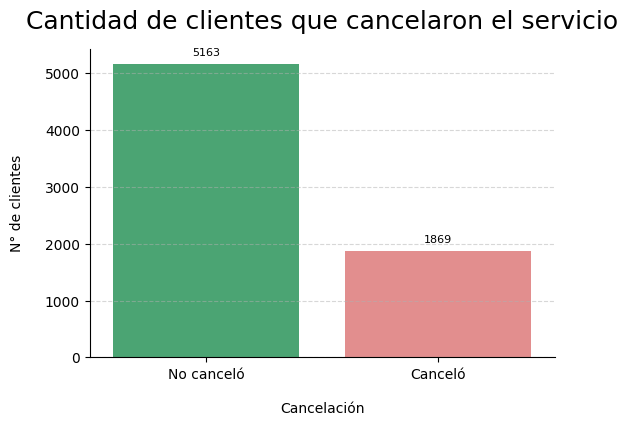

In [17]:
colores = ['mediumseagreen', 'lightcoral']
plt.figure(figsize=(6,4))
plt.subplots_adjust(hspace=0.5,wspace=0.3)
ax = sns.countplot(data=df, x='evacion', palette=colores, hue='evacion', legend=False)
plt.title('Cantidad de clientes que cancelaron el servicio', fontsize=18, pad=15)
plt.xlabel('Cancelación', labelpad=15)
plt.ylabel('N° de clientes', labelpad=15)
plt.xticks([0, 1], ['No canceló', 'Canceló'])
plt.grid(linestyle='--', alpha=0.5, linewidth=0.8, axis='y')
sns.despine()
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # valor
        (p.get_x() + p.get_width() / 2., p.get_height()),  # posición
        ha='center', va='bottom',
        fontsize=8, color='black',
        xytext=(0, 5), textcoords='offset points'
    )
plt.show()

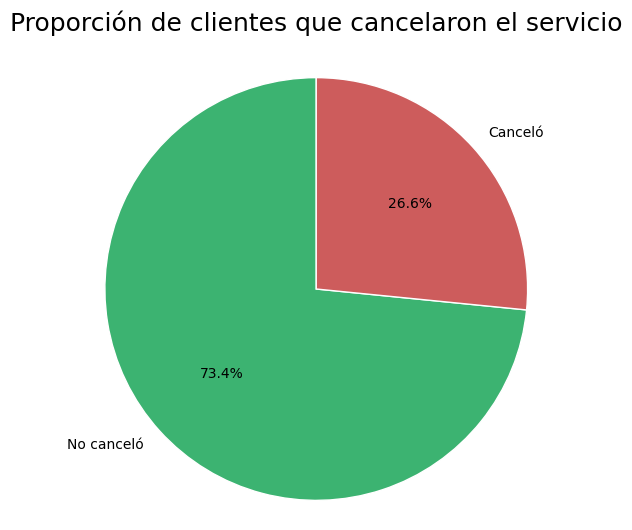

In [18]:
conteo = df['evacion'].value_counts().sort_index()

valores = conteo.values
etiquetas = ['No canceló', 'Canceló']
colores = ['mediumseagreen', 'indianred']

plt.figure(figsize=(6, 6))
plt.pie(
    valores,
    labels=etiquetas,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Proporción de clientes que cancelaron el servicio', fontsize=18, pad=20)
plt.axis('equal')
plt.show()

In [19]:
# Diccionario de mapeo para etiquetas
label_maps = {
    'evacion': {0: 'No canceló', 1: 'Canceló'},
    'cliente_genero': {0: 'Femenino', 1: 'Masculino'},
    'cliente_ciudadano_mayor': {0: 'Menor de 65', 1: '65 o más'},
    'cliente_pareja': {0: 'Sin pareja', 1: 'Con pareja'},
    'cliente_dependientes': {0: 'Sin dependientes', 1: 'Con dependientes'},
    'telefono_servicio': {0: 'Sin teléfono', 1: 'Con teléfono'},
    'telefono_multiples_lineas': {0: 'Una línea', 1: 'Múltiples líneas', -1: 'Sin teléfono'},
    'internet_servicio': {0: 'Sin internet', 1: 'DSL', 2: 'Fibra óptica'},
    'internet_seguridad_en_linea': {0: 'No', 1: 'Sí', -1: 'Sin internet'},
    'internet_respaldo_en_linea': {0: 'No', 1: 'Sí', -1: 'Sin internet'},
    'internet_proteccion_dispositivo': {0: 'No', 1: 'Sí', -1: 'Sin internet'},
    'internet_soporte_tecnico': {0: 'No', 1: 'Sí', -1: 'Sin internet'},
    'internet_streaming_tv': {0: 'No', 1: 'Sí', -1: 'Sin internet'},
    'internet_streaming_peliculas': {0: 'No', 1: 'Sí', -1: 'Sin internet'},
    'cuenta_contrato': {0: 'Mensual', 1: 'Anual', 2: 'Bienal'},
    'cuenta_facturacion_electronica': {0: 'Papel', 1: 'Electrónica'},
    'cuenta_metodo_pago': {0: 'Cuenta correo', 1: 'Cuenta electrónico', 2: 'Tarjeta crédito', 3: 'Transferencia bancaria'}
}

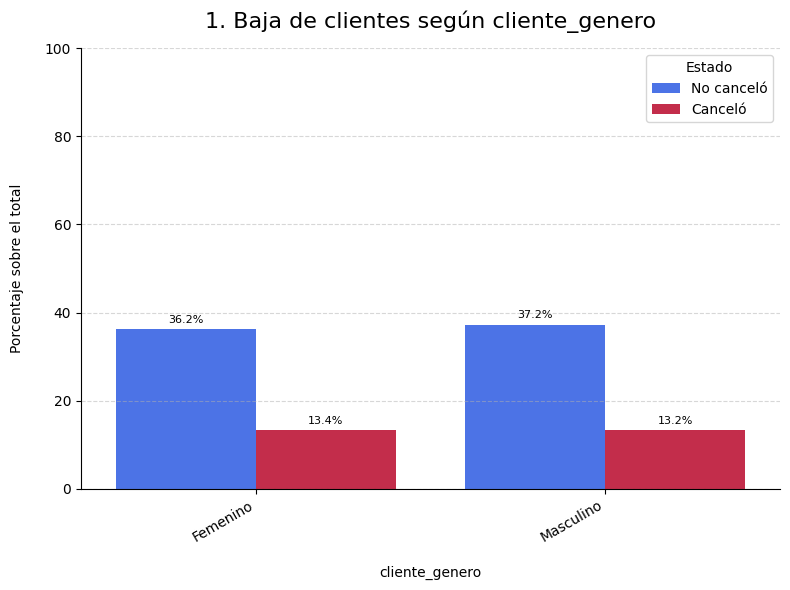

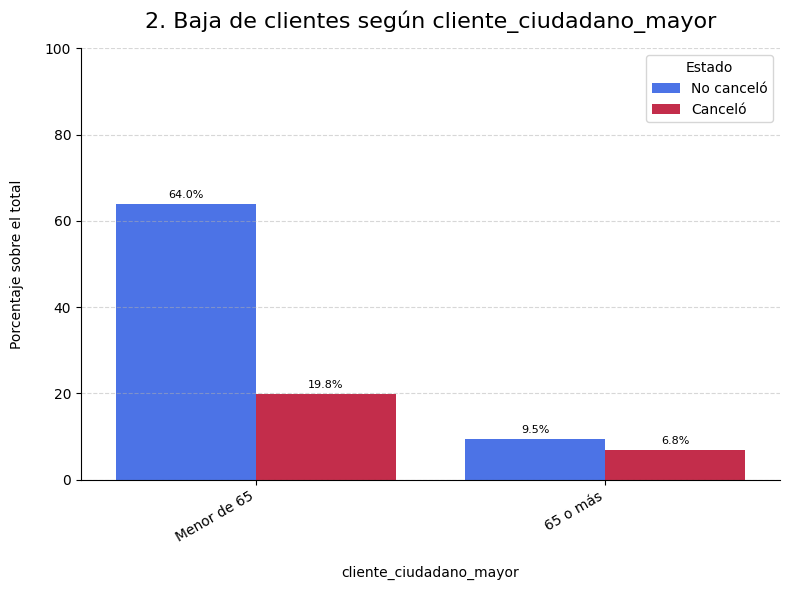

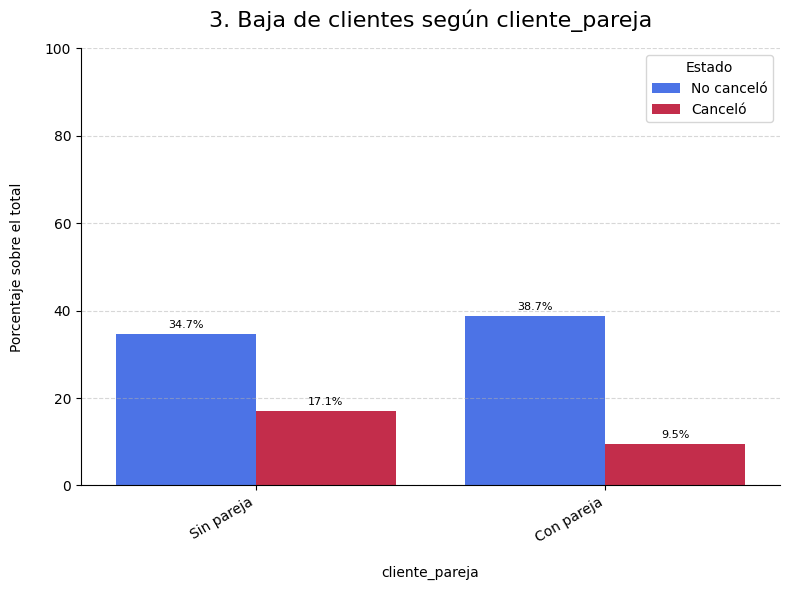

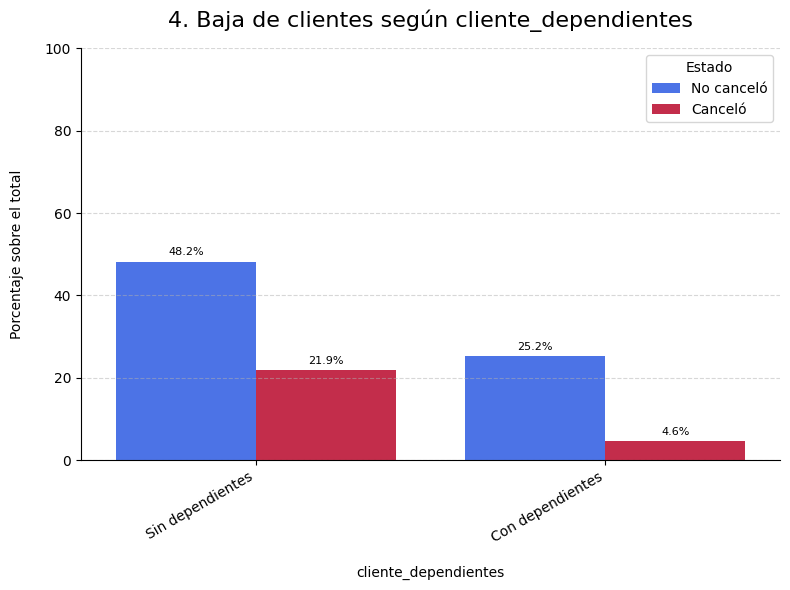

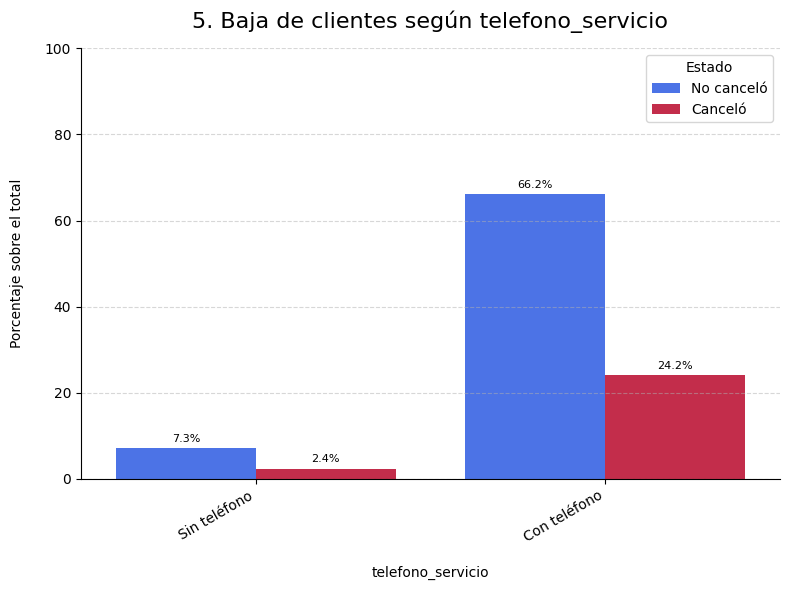

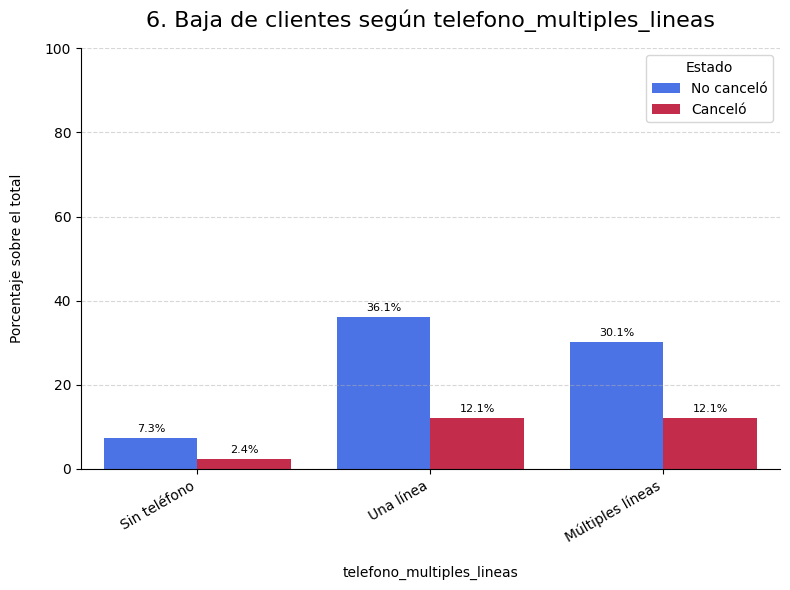

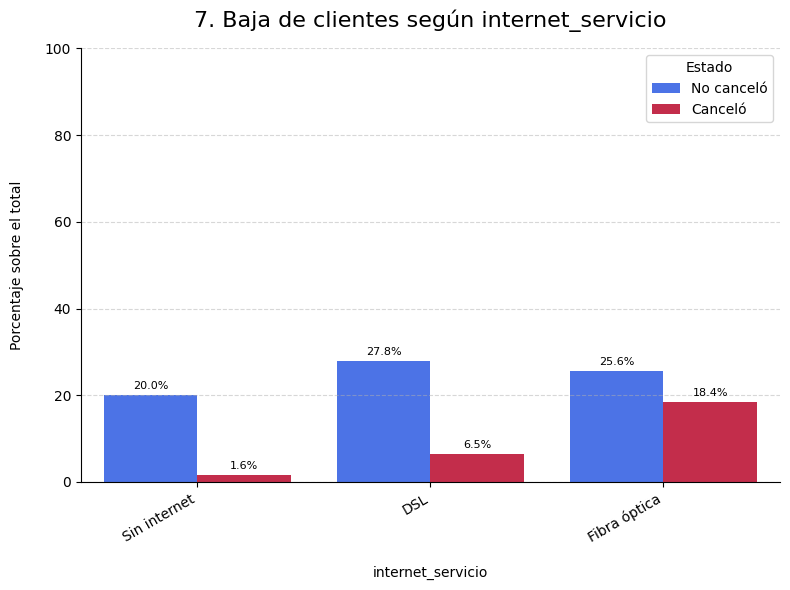

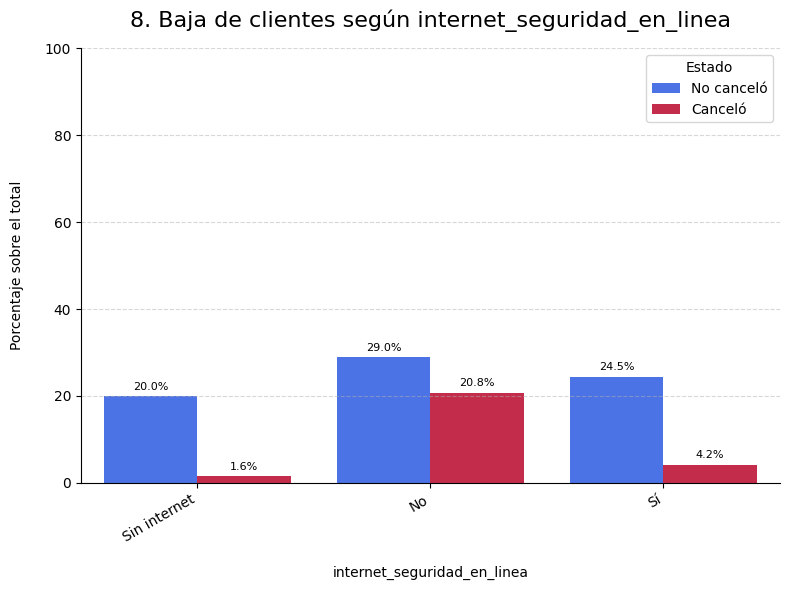

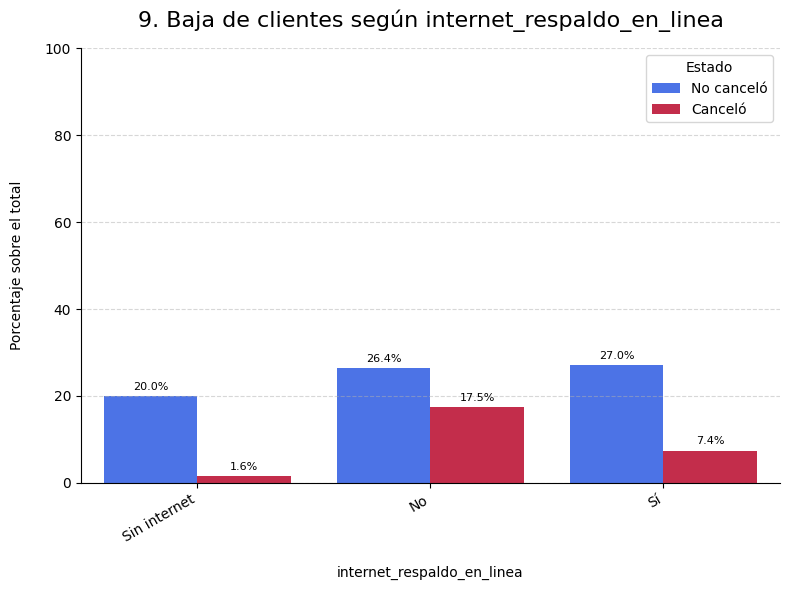

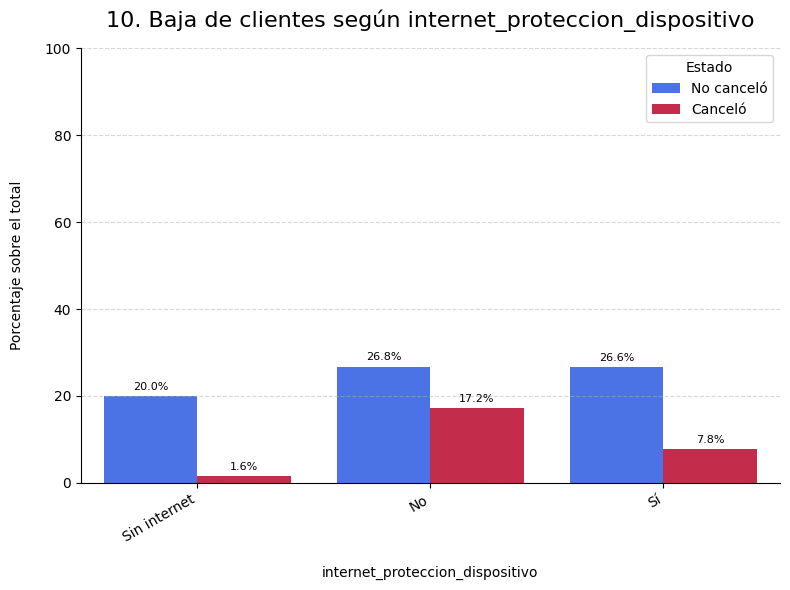

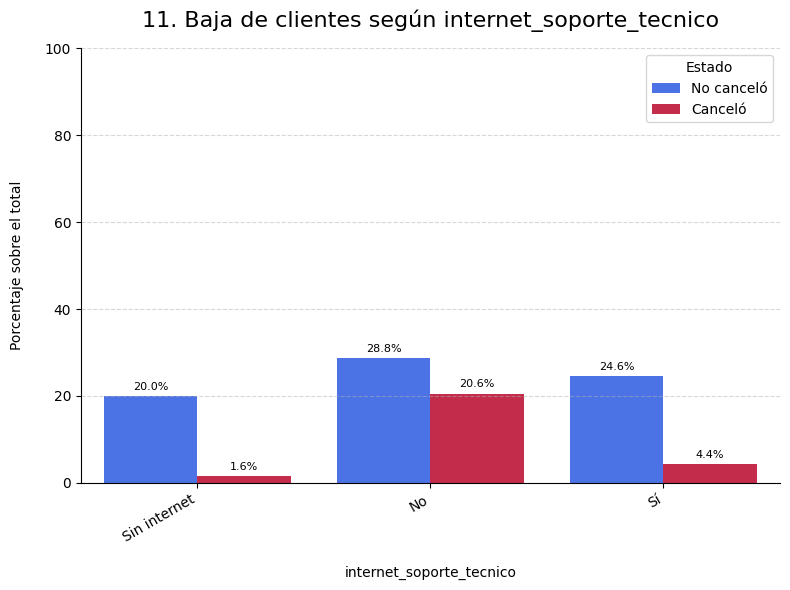

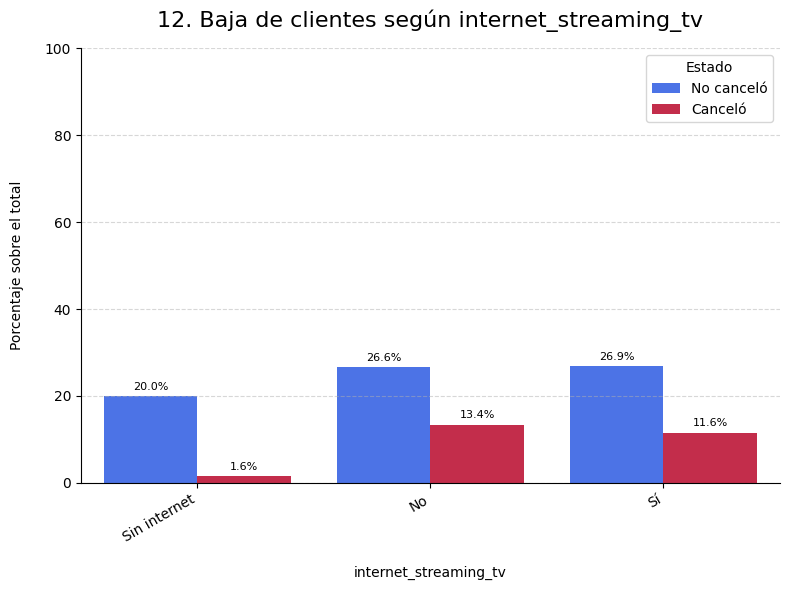

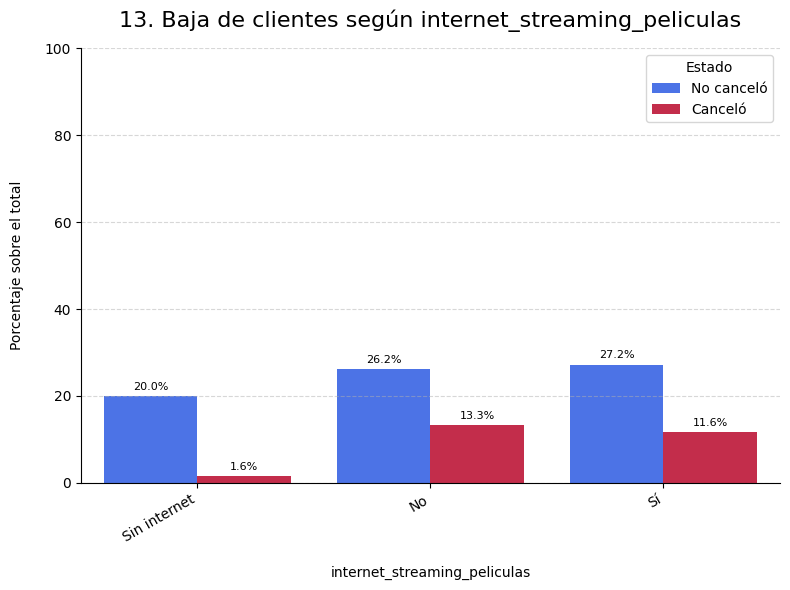

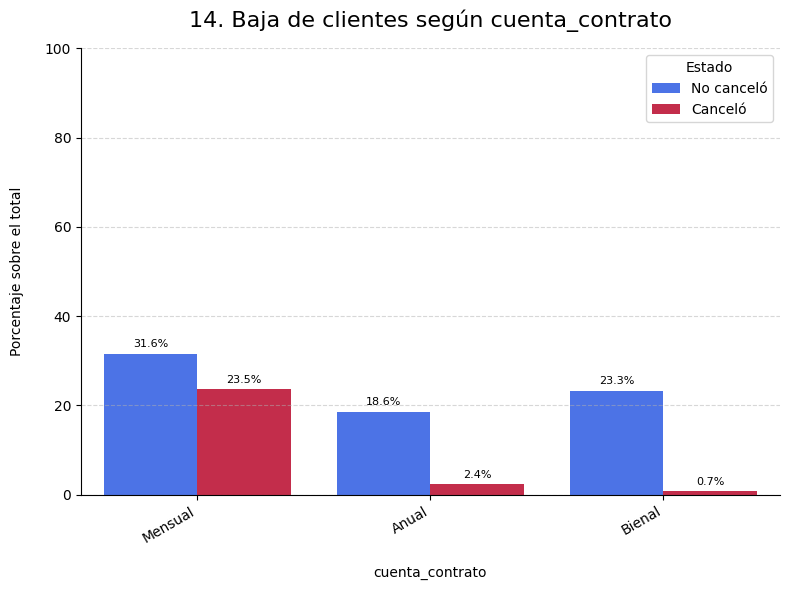

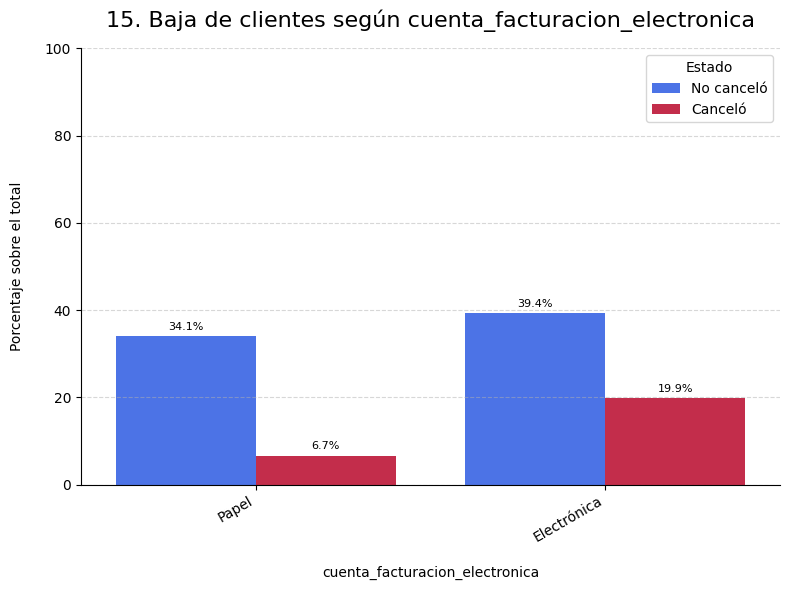

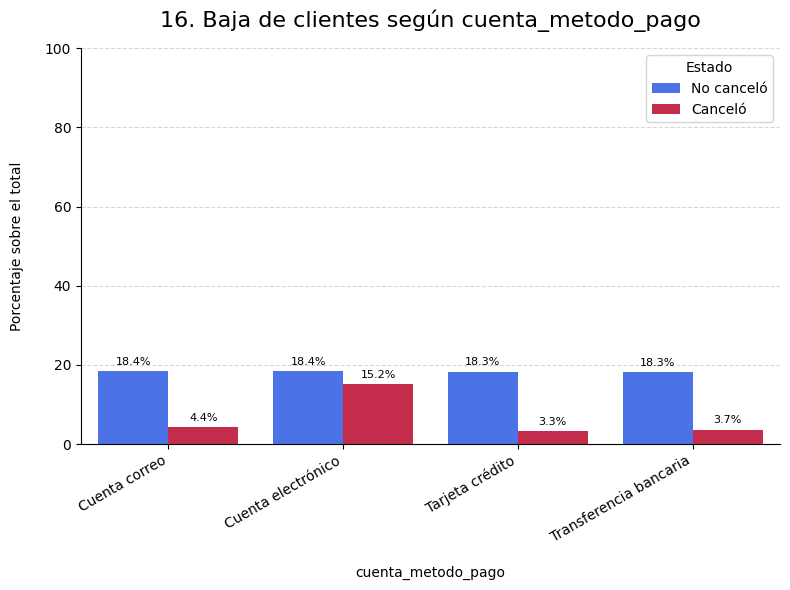

In [20]:
categoricas = [
    'cliente_genero',
    'cliente_ciudadano_mayor',
    'cliente_pareja',
    'cliente_dependientes',
    'telefono_servicio',
    'telefono_multiples_lineas',
    'internet_servicio',
    'internet_seguridad_en_linea',
    'internet_respaldo_en_linea',
    'internet_proteccion_dispositivo',
    'internet_soporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_peliculas',
    'cuenta_contrato',
    'cuenta_facturacion_electronica',
    'cuenta_metodo_pago'
]

estado_global = df['evacion'].value_counts(normalize=True).rename({0: 'No canceló', 1: 'Canceló'}) * 100

for i, col in enumerate(categoricas, start=1):
    tabla = pd.crosstab(df[col], df['evacion'], normalize='all') * 100
    tabla = tabla.reset_index().melt(id_vars=col, value_vars=[0, 1],
                                     var_name='Estado', value_name='Porcentaje')
    tabla['Estado'] = tabla['Estado'].map({0: 'No canceló', 1: 'Canceló'})

    # Mapear categorías, reemplazando -1 por "Desconocido"
    if col in label_maps:
        tabla[col] = tabla[col].map(label_maps[col]).fillna(tabla[col])
    tabla[col] = tabla[col].replace(-1, "Desconocido")

    plt.figure(figsize=(8,6))
    ax = sns.barplot(data=tabla, x=col, y='Porcentaje', hue='Estado',
                     palette=['#3366FF', 'crimson'])

    plt.title(f"{i}. Baja de clientes según {col}", fontsize=16, pad=15)
    plt.ylabel('Porcentaje sobre el total', labelpad=15)
    plt.xlabel(col, labelpad=15)
    plt.ylim(0, 100)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.grid(linestyle='--', alpha=0.5, linewidth=0.8, axis='y')
    sns.despine()

    for p in ax.patches:
        value = p.get_height()
        if value > 0:
            ax.annotate(f'{value:.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom',
                        fontsize=8, color='black',
                        xytext=(0, 3), textcoords='offset points')

    plt.show()


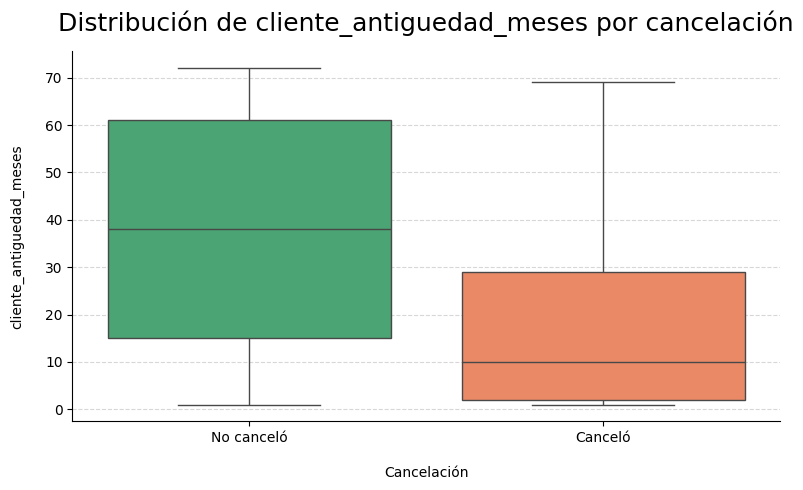

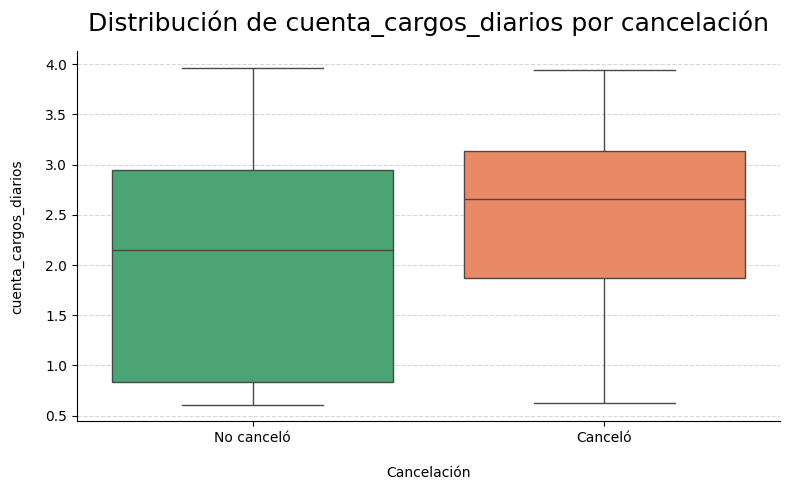

In [21]:
numericas = [
    'cliente_antiguedad_meses',
    'cuenta_cargos_diarios'
]

for col in numericas:
    plt.figure(figsize=(8,5))

    # Mapeo de etiquetas para evacion
    df_plot = df.copy()
    df_plot['evacion'] = df_plot['evacion'].map(label_maps['evacion'])

    sns.boxplot(
        data=df_plot,
        x='evacion',
        y=col,
        hue='evacion',
        palette=['mediumseagreen', 'coral'],
        showfliers=False,        # oculta valores extremos
        legend=False
    )

    plt.title(f'Distribución de {col} por cancelación', fontsize=18, pad=15)
    plt.xlabel('Cancelación', labelpad=15)
    plt.ylabel(col, labelpad=15)
    plt.grid(linestyle='--', alpha=0.5, linewidth=0.8, axis='y')
    sns.despine()
    plt.tight_layout()
    plt.show()

### mini-Informe: Análisis Exploratorio de Datos

El análisis exploratorio (EDA) permitió identificar patrones clave en la baja de clientes (churn):

- **Distribución de Churn**: mayor proporción de cancelaciones en comparación con clientes retenidos.
- **Demografía**: clientes jóvenes, sin pareja y sin dependientes presentan mayor propensión a irse.
- **Servicios**: los contratos mensuales concentran la mayor parte del churn. En contraste, servicios como *OnlineSecurity* y *TechSupport* se asocian con mayor retención.
- **Finanzas**: cargos mensuales altos incrementan el riesgo de abandono, sobre todo en contratos de corta duración.

**Conclusiones principales**  
- El tipo de contrato es el predictor más fuerte del churn.  
- Servicios adicionales de valor aumentan la fidelidad.  
- Cargos elevados sin beneficios adicionales generan mayor insatisfacción.  
- Clientes con menor antigüedad presentan un riesgo elevado de baja.

## Preprocesamiento de Datos

In [22]:
# Modifico label_maps para generar columnas con nombres descriptivos.
label_maps = {
    "telefono_multiples_lineas": {-1: "No_tiene_servicio", 0: "Una_linea", 1: "Varias_lineas"},
    "internet_servicio": {0: "Sin_internet", 1: "DSL", 2: "Fibra_optica"},
    "internet_seguridad_en_linea": {-1: "No_aplica", 0: "No", 1: "Si"},
    "internet_respaldo_en_linea": {-1: "No_aplica", 0: "No", 1: "Si"},
    "internet_proteccion_dispositivo": {-1: "No_aplica", 0: "No", 1: "Si"},
    "internet_soporte_tecnico": {-1: "No_aplica", 0: "No", 1: "Si"},
    "internet_streaming_tv": {-1: "No_aplica", 0: "No", 1: "Si"},
    "internet_streaming_peliculas": {-1: "No_aplica", 0: "No", 1: "Si"},
    "cuenta_contrato": {0: "Mensual", 1: "Anual", 2: "Bienal"},
    "cuenta_metodo_pago": {
        0: "Cuenta_por_correo",
        1: "Cuenta_electronica",
        2: "Tarjeta_credito_auto",
        3: "Transferencia_bancaria_auto"
    }
}

df_cat = df.copy()
for col, mapping in label_maps.items():
    df_cat[col] = df_cat[col].map(mapping)

categoricas = list(label_maps.keys())

# OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop=None, dtype=int)
ohe_array = ohe.fit_transform(df_cat[categoricas])

ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(categoricas), index=df.index)
df_final = pd.concat([df.drop(columns=categoricas), ohe_df], axis=1)

df_final.describe()

,evacion,cliente_genero,cliente_ciudadano_mayor,cliente_pareja,cliente_dependientes,cliente_antiguedad_meses,telefono_servicio,cuenta_facturacion_electronica,cuenta_cargos_mensuales,cuenta_cargos_diarios,...,internet_streaming_peliculas_No,internet_streaming_peliculas_No_aplica,internet_streaming_peliculas_Si,cuenta_contrato_Anual,cuenta_contrato_Bienal,cuenta_contrato_Mensual,cuenta_metodo_pago_Cuenta_electronica,cuenta_metodo_pago_Cuenta_por_correo,cuenta_metodo_pago_Tarjeta_credito_auto,cuenta_metodo_pago_Transferencia_bancaria_auto
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2.159891,...,0.395478,0.216155,0.388367,0.209329,0.239619,0.551052,0.336320,0.228100,0.216297,0.219283
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,1.002955,...,0.488988,0.411650,0.487414,0.406858,0.426881,0.497422,0.472483,0.419637,0.411748,0.413790
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,0.610000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,1.187500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,2.340000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,2.992500,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.960000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   evacion                                         7032 non-null   int64  
 1   cliente_genero                                  7032 non-null   int64  
 2   cliente_ciudadano_mayor                         7032 non-null   int64  
 3   cliente_pareja                                  7032 non-null   int64  
 4   cliente_dependientes                            7032 non-null   int64  
 5   cliente_antiguedad_meses                        7032 non-null   int64  
 6   telefono_servicio                               7032 non-null   int64  
 7   cuenta_facturacion_electronica                  7032 non-null   int64  
 8   cuenta_cargos_mensuales                         7032 non-null   float64
 9   cuenta_cargos_diarios                    

In [24]:
# df_final.to_csv("telecomx1_OHE.csv", index=False, encoding="utf-8")

### Estandarización de datos

In [25]:
# Variable objetivo
y = df_final["evacion"].astype(int)
X = df_final.drop(columns=["evacion"])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print(f"Shape train: {X_train.shape}, test: {X_test.shape}")
print("Distribución de la clase en train:", y_train.value_counts(normalize=True).round(3).to_dict())
print("Distribución de la clase en test :", y_test.value_counts(normalize=True).round(3).to_dict())


Shape train: (5625, 40), test: (1407, 40)
Distribución de la clase en train: {0: 0.734, 1: 0.266}
Distribución de la clase en test : {0: 0.734, 1: 0.266}


In [27]:
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

def es_dummy_01(serie: pd.Series) -> bool:
    vals = pd.Series(serie.dropna().unique())
    return vals.isin([0, 1]).all()

dummies = [c for c in num_cols if es_dummy_01(X_train[c])]
continuas = [c for c in num_cols if c not in dummies]

print(f"Número de columnas numéricas: {len(num_cols)}")
print(f"  - Dummies 0/1 detectadas : {len(dummies)}")
print(f"  - Continuas a escalar    : {len(continuas)}")
print("Continuas:", continuas)

Número de columnas numéricas: 40
  - Dummies 0/1 detectadas : 37
  - Continuas a escalar    : 3
Continuas: ['cliente_antiguedad_meses', 'cuenta_cargos_mensuales', 'cuenta_cargos_diarios']


In [28]:
if {"cuenta_cargos_mensuales", "cliente_antiguedad_meses"}.issubset(df_final.columns):
    for Xpart in (X_train, X_test):
        Xpart["gasto_total_aprox"] = Xpart["cuenta_cargos_mensuales"] * Xpart["cliente_antiguedad_meses"]
    if "gasto_total_aprox" not in continuas:
        continuas.append("gasto_total_aprox")

In [29]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

if continuas:
    X_train_scaled[continuas] = scaler.fit_transform(X_train[continuas])
    X_test_scaled[continuas]  = scaler.transform(X_test[continuas])
else:
    print("[Aviso] No se detectaron continuas, no se aplicó escalado.")

In [30]:
def resumen_estandarizacion(Xdf, cols, etiqueta="TRAIN"):
    if not cols:
        return
    desc = pd.DataFrame({
        "mean": Xdf[cols].mean().round(3),
        "std": Xdf[cols].std(ddof=0).round(3),
        "min": Xdf[cols].min().round(3),
        "max": Xdf[cols].max().round(3)
    }).sort_values("std", ascending=False)
    print(f"\nResumen estandarización ({etiqueta})")
    display(desc.head(10))

resumen_estandarizacion(X_train_scaled, continuas, "TRAIN")
resumen_estandarizacion(X_test_scaled, continuas, "TEST")


Resumen estandarización (TRAIN)


,mean,std,min,max
cliente_antiguedad_meses,0.0,1.0,-1.278,1.606
cuenta_cargos_mensuales,-0.0,1.0,-1.549,1.794
cuenta_cargos_diarios,0.0,1.0,-1.547,1.795
gasto_total_aprox,-0.0,1.0,-0.998,2.752



Resumen estandarización (TEST)


,mean,std,min,max
cuenta_cargos_mensuales,-0.004,1.003,-1.531,1.755
cuenta_cargos_diarios,-0.005,1.003,-1.527,1.755
cliente_antiguedad_meses,-0.008,0.984,-1.278,1.606
gasto_total_aprox,-0.013,0.977,-0.998,2.716


In [31]:
feature_names = X.columns.to_list()
print("Tenemos:")
print(" - X_train_scaled / X_test_scaled (continuas normalizadas)")
print(" - X_train / X_test (sin escalar)  -> para árboles")
print(" - y_train / y_test")
print(" - scaler (para aplicar a nuevos datos)")
print(" - continuas / dummies (para referencia)")

Tenemos:
 - X_train_scaled / X_test_scaled (continuas normalizadas)
 - X_train / X_test (sin escalar)  -> para árboles
 - y_train / y_test
 - scaler (para aplicar a nuevos datos)
 - continuas / dummies (para referencia)


## Análisis de Correlación

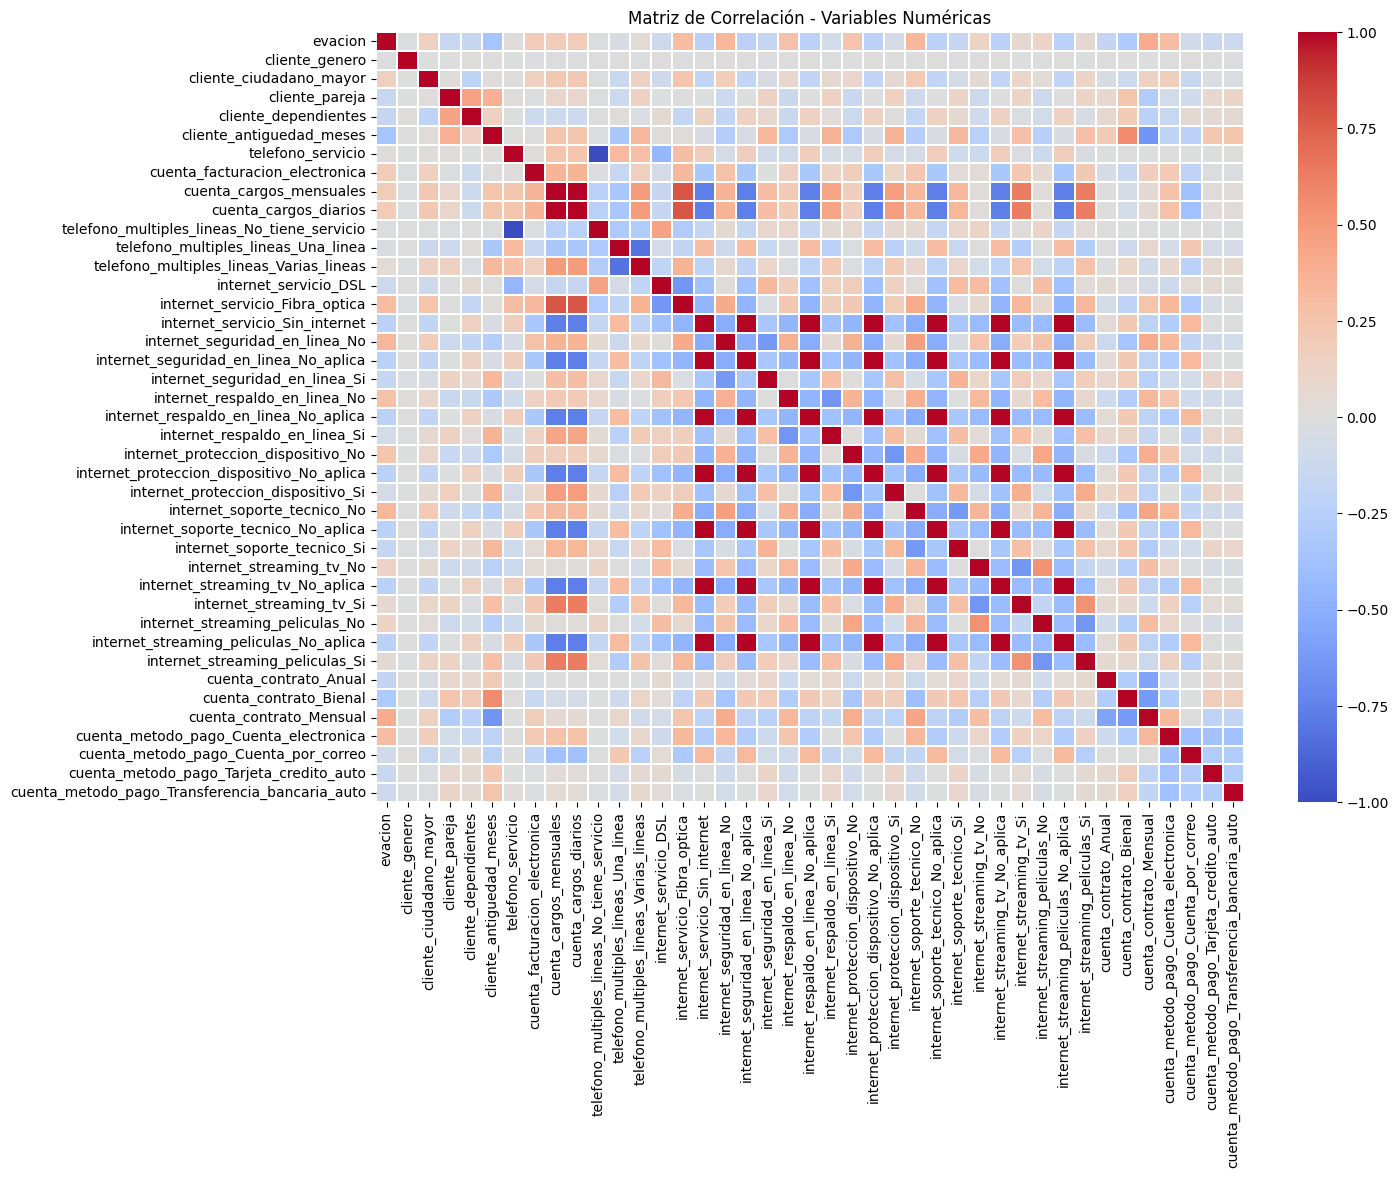

In [32]:
# Seleccionamos solo columnas numéricas
num_cols = df_final.select_dtypes(include=[np.number]).columns

# Calculamos la matriz de correlación
corr = df_final[num_cols].corr()

# Visualización con heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.1)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

In [33]:
# Correlación de cada variable con la variable objetivo 'evacion'
corr_target = corr["evacion"].sort_values(ascending=False)

print("\nCorrelaciones con 'evacion':")
display(corr_target)

# Para ver las 10 variables más correlacionadas (positiva y negativa)
print("\nTop 10 variables con mayor correlación absoluta respecto a 'evacion':")
display(corr_target.abs().sort_values(ascending=False).head(11))  # incluye evacion misma


Correlaciones con 'evacion':


,evacion
evacion,1.000000
cuenta_contrato_Mensual,0.404565
internet_seguridad_en_linea_No,0.342235
internet_soporte_tecnico_No,0.336877
internet_servicio_Fibra_optica,0.307463
cuenta_metodo_pago_Cuenta_electronica,0.301455
internet_respaldo_en_linea_No,0.267595
internet_proteccion_dispositivo_No,0.252056
cuenta_cargos_diarios,0.192914
cuenta_cargos_mensuales,0.192858



Top 10 variables con mayor correlación absoluta respecto a 'evacion':


,evacion
evacion,1.000000
cuenta_contrato_Mensual,0.404565
cliente_antiguedad_meses,0.354049
internet_seguridad_en_linea_No,0.342235
internet_soporte_tecnico_No,0.336877
internet_servicio_Fibra_optica,0.307463
cuenta_contrato_Bienal,0.301552
cuenta_metodo_pago_Cuenta_electronica,0.301455
internet_respaldo_en_linea_No,0.267595
internet_proteccion_dispositivo_No,0.252056


## Lectura de las correlaciones

### Contrato Mensual (+0.40)
- Es la variable con mayor correlación positiva con la cancelación.  
- Clientes con contrato mes a mes son los más inestables: confirma lo visto en los coeficientes de la regresión.  

### Antigüedad en meses (–0.35)
- Fuerte correlación negativa: cuanto más tiempo lleva un cliente, menos probable es que se vaya.  
- Es el “escudo” más claro contra la fuga.  

### Servicios de soporte y seguridad
- **internet_seguridad_en_linea_No (+0.34)** y **internet_soporte_tecnico_No (+0.33)** aparecen fuertemente asociados con cancelación.  
- No contar con servicios adicionales de valor aumenta el riesgo de fuga.  

### Fibra Óptica (+0.31)
- Los clientes con fibra tienden a cancelar más que los que tienen DSL o no internet.  
- Probable relación con el costo elevado de este servicio.  

### Contrato Bienal (–0.30)
- Altamente protector contra la cancelación.  
- Refuerza la estrategia de ofrecer contratos de largo plazo.  

### Método de Pago – Cuenta Electrónica (+0.30)
- Correlación positiva con la cancelación: estos clientes parecen más propensos a irse.  
- Posible perfil de cliente más “autónomo” y menos comprometido.  

### Otros factores relevantes
- **internet_respaldo_en_linea_No (+0.27)** y **internet_proteccion_dispositivo_No (+0.25):** la falta de servicios complementarios se asocia con fuga.  
- **Variables con “No aplica” (–0.23):** suelen aparecer negativas porque son clientes sin servicios extra, que permanecen más tiempo en planes básicos.  


## Síntesis del análisis de correlación

**Riesgo alto:** contrato mensual, poca antigüedad, fibra óptica, métodos de pago electrónicos, y ausencia de servicios de valor agregado.  

**Protección:** antigüedad, contrato bienal, DSL, y perfiles con menos servicios (“no aplica”).  

Con esto se completa el **Análisis de Correlación** que faltaba.  
Ya se tienen los pasos: normalización, correlación, análisis dirigido, separación de datos, modelos, evaluación, importancia de variables y conclusión.


## Análisis Dirigido

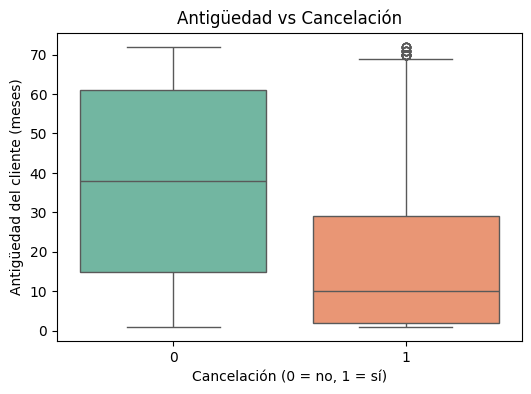

In [34]:
# --- Tiempo de contrato (antigüedad) vs cancelación ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df_final["evacion"].astype("category"),
            y=df_final["cliente_antiguedad_meses"],
            palette="Set2")
plt.xlabel("Cancelación (0 = no, 1 = sí)")
plt.ylabel("Antigüedad del cliente (meses)")
plt.title("Antigüedad vs Cancelación")
plt.show()

Los clientes con baja antigüedad concentran más cancelaciones.

La mediana de meses en los que los clientes cancelan es bastante menor que la de los que permanecen.

Interpretación: el primer año de relación es crítico. Clientes nuevos tienden a abandonar, quizá por expectativas no cumplidas o falta de fidelización temprana.

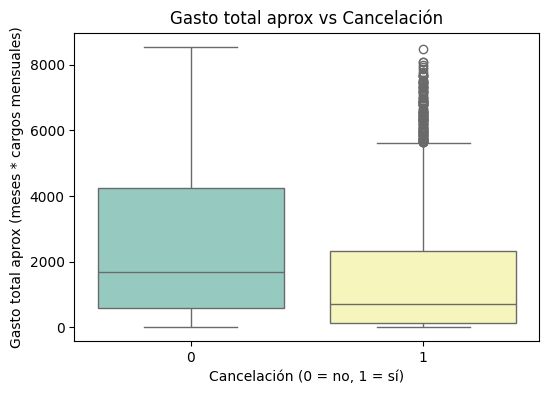

In [35]:
# --- Gasto total aproximado vs cancelación ---
df_final["gasto_total_aprox"] = df_final["cliente_antiguedad_meses"] * df_final["cuenta_cargos_mensuales"]

plt.figure(figsize=(6,4))
sns.boxplot(x=df_final["evacion"].astype("category"),
            y=df_final["gasto_total_aprox"],
            palette="Set3")
plt.xlabel("Cancelación (0 = no, 1 = sí)")
plt.ylabel("Gasto total aprox (meses * cargos mensuales)")
plt.title("Gasto total aprox vs Cancelación")
plt.show()

El gasto acumulado de clientes que cancelan es claramente más bajo.

Los clientes que llevan más tiempo (y por ende han gastado más en total) muestran menor propensión a irse.

Interpretación: si un cliente acumula gasto alto, significa que ha mantenido relación más tiempo → mayor lealtad. Los que gastan poco (porque se fueron rápido o pagan poco) son los que más cancelan.

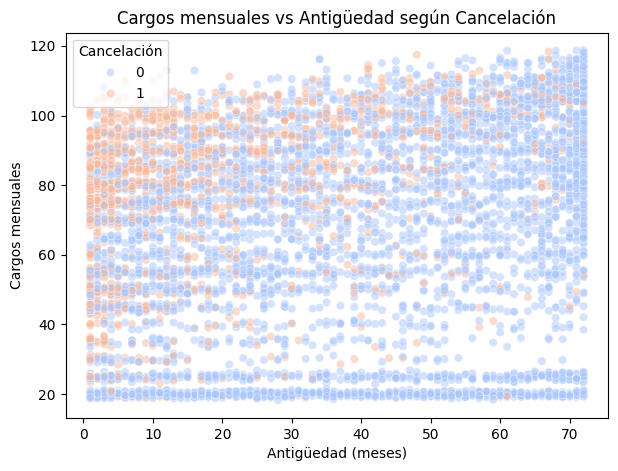

In [36]:
# --- Scatterplot: cargos mensuales vs antigüedad, coloreado por cancelación ---
plt.figure(figsize=(7,5))
sns.scatterplot(x="cliente_antiguedad_meses",
                y="cuenta_cargos_mensuales",
                hue="evacion",
                data=df_final,
                alpha=0.5,
                palette="coolwarm")
plt.xlabel("Antigüedad (meses)")
plt.ylabel("Cargos mensuales")
plt.title("Cargos mensuales vs Antigüedad según Cancelación")
plt.legend(title="Cancelación")
plt.show()

En los primeros meses (0–15), se observa alta proporción de cancelaciones, sobre todo en clientes con cargos altos (80–120).

A mayor antigüedad, los puntos azules (no cancelación) dominan → supervivencia de largo plazo.

Entre los cargos bajos/medios (20–40), se nota más estabilidad (más azul que rojo).

Interpretación: el riesgo de fuga es doblemente fuerte en clientes nuevos y con cargos altos.

### Conclusión general del análisis dirigido:

- Antigüedad es una variable clave: los primeros meses son el período más vulnerable a la cancelación.

- Cargos mensuales altos incrementan el riesgo de abandono.

- Gasto acumulado bajo está fuertemente asociado a clientes que cancelan.

## Separación de Datos

In [37]:
print("Conjunto de entrenamiento (sin escalar):", X_train.shape, " etiquetas:", y_train.shape)
print("Conjunto de prueba       (sin escalar):", X_test.shape,  " etiquetas:", y_test.shape)

print("\nConjunto de entrenamiento (escalado, para modelos sensibles a escala):", X_train_scaled.shape)
print("Conjunto de prueba       (escalado, para modelos sensibles a escala):", X_test_scaled.shape)

print("\nDistribución de la variable objetivo (evacion):")
print("Train:\n", y_train.value_counts(normalize=True).round(3))
print("\nTest:\n", y_test.value_counts(normalize=True).round(3))

Conjunto de entrenamiento (sin escalar): (5625, 41)  etiquetas: (5625,)
Conjunto de prueba       (sin escalar): (1407, 41)  etiquetas: (1407,)

Conjunto de entrenamiento (escalado, para modelos sensibles a escala): (5625, 41)
Conjunto de prueba       (escalado, para modelos sensibles a escala): (1407, 41)

Distribución de la variable objetivo (evacion):
Train:
 evacion
0    0.734
1    0.266
Name: proportion, dtype: float64

Test:
 evacion
0    0.734
1    0.266
Name: proportion, dtype: float64


In [38]:
datasets = {
    "X_train": X_train,
    "X_test": X_test,
    "X_train_scaled": X_train_scaled,
    "X_test_scaled": X_test_scaled,
    "y_train": y_train,
    "y_test": y_test
}

## Creación de Modelos

In [39]:
log_reg = LogisticRegression(max_iter=2000, solver="lbfgs", random_state=42)
log_reg.fit(X_train_scaled, y_train)
print(" Modelos entrenados - Regresión Logística (con normalización)")

 Modelos entrenados - Regresión Logística (con normalización)


In [40]:
rf_clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)
print("Modelos entrenados - Random Forest (sin normalización)")

Modelos entrenados - Random Forest (sin normalización)


## Evaluación de los Modelos

In [41]:
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, nombre="modelo"):
    # Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test  = modelo.predict(X_test)

    # Métricas en test
    acc  = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test, zero_division=0)
    rec  = recall_score(y_test, y_pred_test, zero_division=0)
    f1   = f1_score(y_test, y_pred_test, zero_division=0)

    print(f"\n=== {nombre} ===")
    print("Métricas en TEST:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-score : {f1:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    # Reporte completo
    print("\nReporte de clasificación (TEST):")
    print(classification_report(y_test, y_pred_test, digits=4, zero_division=0))

    # Verificación de overfitting/underfitting
    acc_train = accuracy_score(y_train, y_pred_train)
    gap = acc_train - acc
    print(f"Accuracy (train): {acc_train:.4f} | Accuracy (test): {acc:.4f} | Gap: {gap:.4f}")
    if gap > 0.10 and acc_train > acc:
        print("⚠️ Posible overfitting: el modelo aprende demasiado del train y generaliza mal.")
    elif acc < 0.70:
        print("⚠️ Posible underfitting: el modelo no captura bien los patrones.")
    else:
        print("✅ No se observan señales fuertes de overfitting/underfitting.")

    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}


=== Regresión Logística ===
Métricas en TEST:
  Accuracy : 0.8010
  Precision: 0.6546
  Recall   : 0.5321
  F1-score : 0.5870


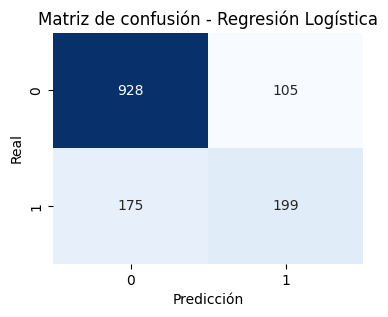


Reporte de clasificación (TEST):
              precision    recall  f1-score   support

           0     0.8413    0.8984    0.8689      1033
           1     0.6546    0.5321    0.5870       374

    accuracy                         0.8010      1407
   macro avg     0.7480    0.7152    0.7280      1407
weighted avg     0.7917    0.8010    0.7940      1407

Accuracy (train): 0.8071 | Accuracy (test): 0.8010 | Gap: 0.0061
✅ No se observan señales fuertes de overfitting/underfitting.

=== Random Forest ===
Métricas en TEST:
  Accuracy : 0.7953
  Precision: 0.6525
  Recall   : 0.4920
  F1-score : 0.5610


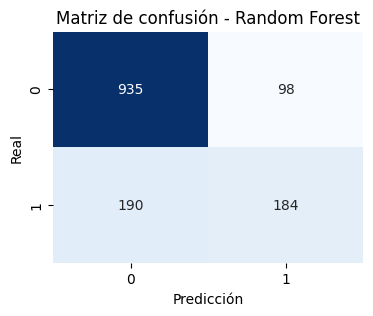


Reporte de clasificación (TEST):
              precision    recall  f1-score   support

           0     0.8311    0.9051    0.8665      1033
           1     0.6525    0.4920    0.5610       374

    accuracy                         0.7953      1407
   macro avg     0.7418    0.6986    0.7138      1407
weighted avg     0.7836    0.7953    0.7853      1407

Accuracy (train): 0.9977 | Accuracy (test): 0.7953 | Gap: 0.2024
⚠️ Posible overfitting: el modelo aprende demasiado del train y generaliza mal.

Resumen comparativo:
Regresión Logística: {'accuracy': 0.8009950248756219, 'precision': 0.6546052631578947, 'recall': 0.5320855614973262, 'f1': 0.5870206489675516}
Random Forest: {'accuracy': 0.7953091684434968, 'precision': 0.6524822695035462, 'recall': 0.4919786096256685, 'f1': 0.5609756097560976}


In [42]:
resultados_lr = evaluar_modelo(log_reg, X_train_scaled, y_train, X_test_scaled, y_test, nombre="Regresión Logística")
resultados_rf = evaluar_modelo(rf_clf, X_train, y_train, X_test, y_test, nombre="Random Forest")

print("\nResumen comparativo:")
print("Regresión Logística:", resultados_lr)
print("Random Forest:", resultados_rf)

### Regresión Logística

- Accuracy: 80.1% → sólido.

- Precision (clase 1 = cancelación): 65% → cuando predice que un cliente cancela, acierta 2 de cada 3 veces.

- Recall: 53% → captura a poco más de la mitad de los clientes que realmente cancelan.

- F1-score: 0.59 → balance medio entre precisión y recall.

Diagnóstico: el modelo está equilibrado, no presenta signos fuertes de overfitting (train ≈ test).

### Random Forest

- Accuracy: 79.5% → casi igual que LR.

- Precision: 65% (similar a LR).

- Recall: 49% → un poco más bajo que la regresión logística.

- F1-score: 0.56 → rendimiento inferior en recall y F1.

Diagnóstico: overfitting fuerte → Accuracy en train ~99.8% pero cae a 79.5% en test (gap 20%). El bosque memorizó demasiado el entrenamiento.

### Comparación

Ambos modelos tienen un desempeño muy parecido en accuracy y precision.

Regresión Logística supera en recall y F1, además generaliza mejor (sin overfitting marcado).

Random Forest muestra más potencia en entrenamiento pero pierde al generalizar → necesita regularización (menos profundidad, menos árboles, o tuning de parámetros).

## Análisis de la Importancia de las Variables

In [43]:
coeficientes = pd.DataFrame({
    "Variable": X_train_scaled.columns,
    "Coeficiente": log_reg.coef_.ravel()
}).sort_values("Coeficiente", ascending=False)

print("Top 10 coeficientes positivos (aumentan prob. de cancelación):")
display(coeficientes.head(10))

print("Top 10 coeficientes negativos (disminuyen prob. de cancelación):")
display(coeficientes.tail(10))

Top 10 coeficientes positivos (aumentan prob. de cancelación):


,Variable,Coeficiente
40,gasto_total_aprox,0.619777
35,cuenta_contrato_Mensual,0.527652
13,internet_servicio_Fibra_optica,0.450250
6,cuenta_facturacion_electronica,0.366599
1,cliente_ciudadano_mayor,0.250792
36,cuenta_metodo_pago_Cuenta_electronica,0.182527
29,internet_streaming_tv_Si,0.124257
24,internet_soporte_tecnico_No,0.122947
15,internet_seguridad_en_linea_No,0.087503
32,internet_streaming_peliculas_Si,0.054108


Top 10 coeficientes negativos (disminuyen prob. de cancelación):


,Variable,Coeficiente
31,internet_streaming_peliculas_No_aplica,-0.294249
14,internet_servicio_Sin_internet,-0.294249
25,internet_soporte_tecnico_No_aplica,-0.294249
22,internet_proteccion_dispositivo_No_aplica,-0.294249
16,internet_seguridad_en_linea_No_aplica,-0.294249
19,internet_respaldo_en_linea_No_aplica,-0.294249
28,internet_streaming_tv_No_aplica,-0.294249
12,internet_servicio_DSL,-0.589109
34,cuenta_contrato_Bienal,-0.778181
4,cliente_antiguedad_meses,-1.322390


In [44]:
importancias = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf_clf.feature_importances_
}).sort_values("Importancia", ascending=False)

print("Top 15 variables más importantes según Random Forest:")
display(importancias.head(15))

Top 15 variables más importantes según Random Forest:


,Variable,Importancia
40,gasto_total_aprox,0.147680
4,cliente_antiguedad_meses,0.133236
7,cuenta_cargos_mensuales,0.121253
8,cuenta_cargos_diarios,0.102984
35,cuenta_contrato_Mensual,0.053496
24,internet_soporte_tecnico_No,0.031051
36,cuenta_metodo_pago_Cuenta_electronica,0.031031
15,internet_seguridad_en_linea_No,0.030456
0,cliente_genero,0.025598
6,cuenta_facturacion_electronica,0.023104


## Regresión Logística

### Variables que AUMENTAN la probabilidad de cancelación (coeficientes positivos)

- **gasto_total_aprox (+0.62)** → aunque suene contraintuitivo, el gasto acumulado alto puede reflejar clientes que pagan mucho (mes a mes con cargos altos) y por eso son más sensibles a cancelar.  
- **cuenta_contrato_Mensual (+0.52)** → los contratos mensuales son los más riesgosos, lo esperado en churn de telecomunicaciones.  
- **internet_servicio_Fibra_optica (+0.45)** → clientes con fibra muestran mayor propensión a cancelar (posiblemente por precio alto).  
- **cuenta_facturacion_electronica (+0.36)** → asociado a mayor riesgo, quizás porque estos clientes son más “independientes” y menos fidelizados.  
- **cliente_ciudadano_mayor (+0.25)** → clientes mayores muestran más tendencia a cancelar.  

### Variables que REDUCEN la probabilidad de cancelación (coeficientes negativos)

- **cliente_antiguedad_meses (–1.32)** → la antigüedad es la variable más protectora: cuanto más tiempo lleva el cliente, menor probabilidad de cancelar.  
- **cuenta_contrato_Bienal (–0.77)** → contratos largos protegen fuertemente contra la fuga.  
- **internet_servicio_DSL (–0.59)** → usuarios de DSL tienden a permanecer más que los de fibra.  
- **Variables “No aplica” (soporte, seguridad, respaldo, etc.)** → también aparecen con coeficiente negativo; son perfiles sin internet o con menos servicios, que suelen mantenerse.  


## Random Forest

### Variables más importantes (según impureza)

- **gasto_total_aprox (0.148)** y **cliente_antiguedad_meses (0.133)** → las dos más fuertes, confirman el efecto conjunto de antigüedad × gasto.  
- **cuenta_cargos_mensuales (0.121)** y **cuenta_cargos_diarios (0.103)** → nivel de gasto mensual influye mucho.  
- **cuenta_contrato_Mensual (0.053)** → otra vez aparece como riesgo.  
- **Servicios (internet_soporte_tecnico_No, internet_seguridad_en_linea_No)** → la falta de soporte o seguridad se asocia a más cancelación.  
- **cuenta_metodo_pago_Cuenta_electronica** y **cuenta_facturacion_electronica** → también aparecen como relevantes.  


## Interpretación combinada

**Factores de riesgo claros:** contrato mensual, cargos altos, fibra óptica, poca antigüedad.  

**Factores protectores:** antigüedad alta, contrato bienal, DSL, “no aplica” en servicios extra (posible sesgo: clientes sin internet no cancelan porque ya están en un plan mínimo).  

**Conclusión preliminar:** clientes nuevos con cargos altos y contrato mensual son el grupo más vulnerable → foco clave de retención.

# Informe Final – Predicción de Cancelación de Clientes (TelecomX LATAM)

## 1. Objetivo
El análisis buscó identificar los factores más relevantes que explican la cancelación de clientes (churn) en TelecomX LATAM y evaluar modelos predictivos que permitan anticipar la fuga. Con base en los resultados, se proponen estrategias de retención para reducir la tasa de cancelación.

---

## 2. Análisis Exploratorio

### Correlación de Variables con Cancelación
- **Contrato Mensual**: la variable más asociada a la cancelación (correlación +0.40).
- **Antigüedad del cliente**: relación negativa fuerte (–0.35). A mayor antigüedad, menor probabilidad de cancelación.
- **Servicios adicionales**:
  - Ausencia de seguridad en línea (+0.34) y de soporte técnico (+0.33) aumentan la probabilidad de fuga.
  - Ausencia de respaldo en línea (+0.27) y de protección de dispositivo (+0.25) también incrementan el riesgo.
- **Fibra Óptica**: correlación positiva con cancelación (+0.31).
- **Contrato Bienal**: correlación negativa (–0.30), asociado con permanencia.
- **Método de pago Cuenta Electrónica**: correlación positiva (+0.30), indicando mayor riesgo de fuga.

### Análisis Dirigido
- **Antigüedad vs Cancelación**: los clientes con menor tiempo en la compañía concentran más cancelaciones.
- **Gasto Total Aproximado vs Cancelación**: los clientes con bajo gasto acumulado presentan mayor tendencia a cancelar.
- **Cargos Mensuales vs Antigüedad**: clientes nuevos con cargos elevados muestran el mayor riesgo de cancelación.

---

## 3. Modelos Predictivos

Se entrenaron dos modelos:

- **Regresión Logística (con normalización)**  
  - Accuracy: 80.1%  
  - Precision: 65.5%  
  - Recall: 53.2%  
  - F1-score: 0.59  
  - Generaliza bien, sin indicios de sobreajuste.

- **Random Forest (sin normalización)**  
  - Accuracy: 79.5%  
  - Precision: 65.2%  
  - Recall: 49.2%  
  - F1-score: 0.56  
  - Presenta sobreajuste (train ~99.8% vs test ~79.5%).

**Conclusión de desempeño:** La Regresión Logística es más equilibrada y explica mejor qué factores influyen en la cancelación. Random Forest requiere ajuste de hiperparámetros para mejorar su capacidad de generalización.

---

## 4. Importancia de Variables

### Regresión Logística
- Factores que aumentan la cancelación:
  - Gasto total aproximado.
  - Contrato Mensual.
  - Internet con Fibra Óptica.
  - Facturación Electrónica.
  - Ser ciudadano mayor.
- Factores que reducen la cancelación:
  - Antigüedad del cliente (la más influyente).
  - Contrato Bienal.
  - Internet DSL.
  - Modalidades “No aplica” en servicios adicionales.

### Random Forest
Las variables más relevantes son:
- Gasto total aproximado.
- Antigüedad del cliente.
- Cargos mensuales y diarios.
- Contrato Mensual.
- Falta de soporte técnico y seguridad en línea.
- Método de pago con cuenta electrónica.

---

## 5. Conclusiones

Los resultados confirman que la cancelación está impulsada principalmente por:
- **Contrato Mensual**.
- **Cargos mensuales altos y gasto elevado**.
- **Clientes nuevos con baja antigüedad**.
- **Uso de Fibra Óptica**.
- **Falta de servicios adicionales de valor**.
- **Método de pago electrónico**.

Por otro lado, los clientes con **contratos de largo plazo (bienales)**, **antigüedad alta** y **planes básicos (DSL o sin servicios adicionales)** muestran mayor fidelidad.

---

## 6. Recomendaciones de Negocio

1. **Fomentar contratos de largo plazo**  
   Implementar descuentos o beneficios adicionales para que los clientes migren de contratos mensuales a anuales o bienales.

2. **Programa de fidelización temprana**  
   Diseñar campañas de retención específicas para clientes en los primeros 12 meses, dado que son los más vulnerables a cancelar.

3. **Gestión proactiva de clientes de alto gasto**  
   Monitorear y ofrecer beneficios diferenciados a clientes con cargos mensuales elevados, para reducir el impacto del costo percibido.

4. **Revisión de planes de Fibra Óptica**  
   Analizar la estructura de precios y ofrecer paquetes con servicios adicionales que aumenten la percepción de valor.

5. **Atención especial a clientes con facturación electrónica**  
   Identificar por qué este segmento presenta mayor fuga y reforzar la comunicación o beneficios asociados.

---

## 7. Síntesis

El análisis permite segmentar claramente a los clientes con mayor riesgo de cancelación y orientar estrategias de retención focalizadas.  
La **Regresión Logística** se presenta como el modelo más adecuado para predecir y explicar el churn, y los hallazgos sugieren que actuar sobre **contratos, antigüedad y nivel de gasto** puede generar el mayor impacto en la reducción de la cancelación.
